# Aproximação

Como aproximar um conjunto de dados usando uma sequência de funções simples?

 * Polinômios
 * Interpolação - Introdução
 * Interpolação de Lagrange
 * Método dos mínimos quadrados
 * Códigos

# Introdução

Qual o objetivo?

 1. Modelar dados experimentais
 2. Aproximar uma função complexa usando funções mais simples

Dada uma função $u(x)$ queremos aproximá-la usando um conjunto de funções que são, de alguma, forma convenientes:

$$
u \approx u^\delta (x) = \sum_{i=1}^N \hat{u}_i \phi_i(x)
$$


Porque queremos fazer isso? 

 * Funções muito complexas 
 * Funções que não são conhecidas explicitamente (algumas funções especiais)
 * Queremos desempenho na hora de calcular as funções: praticamente todas as funções básicas são aproximadas utilizando polinômios (muitas vezes polinômios racionais)
 * Quando conhecemos apenas alguns pontos da função: sempre que você tiver um experimento ou estiver processando dados de uma sequência de simulações numéricas.
 
 
 


In [2]:
methods(sin)

# 12 methods for generic function "sin":
[1] sin(x::BigFloat) in Base.MPFR at mpfr.jl:744
[2] sin(::Missing) in Base.Math at math.jl:1167
[3] sin(a::Complex{Float16}) in Base.Math at math.jl:1115
[4] sin(a::Float16) in Base.Math at math.jl:1114
[5] sin(z::Complex{T}) where T in Base at complex.jl:805
[6] sin(x::T) where T<:Union{Float32, Float64} in Base.Math at special/trig.jl:30
[7] sin(x::Real) in Base.Math at special/trig.jl:53
[8] sin(A::LinearAlgebra.Hermitian{#s663,S} where S<:(AbstractArray{#s664,2} where #s664<:#s663) where #s663<:Complex) in LinearAlgebra at /opt/julia-1.4.1/share/julia/stdlib/v1.4/LinearAlgebra/src/symmetric.jl:907
[9] sin(A::Union{LinearAlgebra.Hermitian{#s664,S}, LinearAlgebra.Symmetric{#s664,S}} where S where #s664<:Real) in LinearAlgebra at /opt/julia-1.4.1/share/julia/stdlib/v1.4/LinearAlgebra/src/symmetric.jl:903
[10] sin(D::LinearAlgebra.Diagonal) in LinearAlgebra at /opt/julia-1.4.1/share/julia/stdlib/v1.4/LinearAlgebra/src/diagonal.jl:561
[11] sin(A::AbstractArray{#s664,2} where #s664<:Real) in LinearAlgebra at /opt/julia-1.4.1/share/julia/stdlib/v1.4/LinearAlgebra/src/dense.jl:826
[12] sin(A::AbstractArray{#s664,2} where #s664<:Complex) in LinearAlgebra at /opt/julia-1.4.1/share/julia/stdlib/v1.4/LinearAlgebra/src/dense.jl:833

## Interpolação

É lógico que, em geral, a aproximação é apenas uma aproximação! Então existe um erro:

$$
u(x) - u^\delta(x) = \varepsilon(x)
$$

A idéia é minimizar este erro de alguma forma.

Uma possibilidade é escolher $N$ pontos $x_i$ e impor que o erro é zero nestes pontos:

$$
\varepsilon(x_i) = 0 \qquad i=1, \ldots, N
$$

Esta abordagem é conhecida na literatura como colocação. Se a função $u(x)$ é conhecida apenas por alguns pontos $(x_i, u_i)$ isto é chamado de *interpolação*.

Isto resulta num sistema de equações lineares:

$$
\left(\begin{matrix}
\phi_1(x_1) & \phi_2(x_1) & \cdots & \phi_N(x_1) \\
\phi_1(x_2) & \phi_2(x_2) & \cdots & \phi_N(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_1(x_N) & \phi_2(x_N) & \cdots & \phi_N(x_N) \\
\end{matrix}\right)
\cdot\left(\begin{matrix} \hat{u}_1 \\ \hat{u}_2 \\ \vdots \\ \hat{u}_N \end{matrix}
\right)
= \left(\begin{matrix} u(x_1) \\ u(x_2) \\ \vdots \\ u(x_N) \end{matrix}
\right)
$$
Esta é a matriz de Vandermonde.

A escolha de funções $\phi_i(x)$ adequadas simplificam a solução do problema. Se, por exemplo, $\phi_i(x_k) = \delta_{ik}$ onde $\delta$, neste caso, é o delta de Kronecker, a matriz é diagonal.


## Mínimos quadrados
Por outro lado, podemos, para uma sequência de pontos minimizar o erro quadrático total:

$$
R(\hat{u}_1, \ldots, \hat{u}_N) = \sum_{i=1}^Q \left[ u(x_i) - u^\delta(x_i)\right]^2
$$
onde $Q$ é o número de pontos. Esta operação se chama método dos mínimos quadrados.

Chamando $u(x_i) = u_i$, para minimizar este resíduo (erro quadrático total), basta derivar e igualar a zero, assim, chega-se ao seguinte sistema de equações lineares:

$$
\left(
\begin{matrix}
\sum_{i=1}^Q \phi_1(x_i)\cdot\phi_1(x_i) & 
\cdots &
\sum_{i=1}^Q \phi_1(x_i)\cdot\phi_N(x_i) \\
\sum_{i=1}^Q \phi_2(x_i)\cdot\phi_1(x_i) & 
\cdots &
\sum_{i=1}^Q \phi_2(x_i)\cdot\phi_N(x_i) \\
\vdots & \ddots & \vdots \\
\sum_{i=1}^Q \phi_N(x_i)\cdot\phi_1(x_i) & 
\cdots &
\sum_{i=1}^Q \phi_N(x_i)\cdot\phi_N(x_i) \\
\end{matrix}\right)
\cdot
\left(\begin{matrix} \hat{u}_1 \\ \hat{u}_2 \\ \vdots \\ \hat{u}_N \end{matrix}\right)
= 
\left(\begin{matrix} \sum_{i=1}^Q u_i \phi_1(x_i) \\ \sum_{i=1}^Q u_i \phi_1(x_i) \\  \vdots \\ \sum_{i=1}^Q u_i \phi_1(x_i)\end{matrix}\right)
$$






## Uma formulação mais geral

Uma formulação mais geral é escolher funções peso $w_k(x)$ de modo que
$$
\int_a^b u(x)w_k(x)\:dx = \int_a^b u^\delta (x) w_k(x) \:dx
$$

Escolhendo $w_k(x)$ = $\delta(x_k)$ (*Delta* de Dirac), recuperamos a interpolação. Escolhendo $w_k(x) = \phi_k(x)$ temos o método de Galerkin, muito usado no método de elementos finitos.

Com o método de elementos finitos, a função não necessariamente vai passar pelos pontos, mas o erro será minimizado e pode-se obter uma aproximação melhor.

Outro ponto a ser considerador é o que ocorre quando as medidas possuem erro e como isso afeta a aproximação.

# Polinômios

$$
p_n(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \ldots a_n x^n = \sum_{i=0}^n a_i x^i
$$
Um polinômio é dado por seus coeficientes $a_i$.
Em Julia, a indexação começa em 1, portanto é conveniente reescrever a definição acima como:

$$
p_n(x) = a_1 + a_2 x + a_3 x^2 + a_4 x^3 + \ldots a_n x^{n-1} + a_{n+1} x^n = \sum_{i=1}^{n+1} a_i x^{i-1}
$$



In [3]:
function polyval1(a, x)
    n = length(a)
    
    y = 0.0
    for i in 1:n
        y += a[i] * x^(i-1)
    end
    
    return y
end


polyval1 (generic function with 1 method)

### Método de Horner

Maneira mais eficiente e mais precisa de calcular o valor de um polinômio:

$$
p_n(x) = a_1 + x\left(a_2 + x\left(a_3 + x\left(\ldots + a_{n+1} x\right) \right) \right)
$$

In [4]:
function polyval2(a, x)
    
    y = a[end]
    
    for i = (lastindex(a)-1):-1:1
        y = a[i] + x * y
    end
    
    return y
    
end


polyval2 (generic function with 1 method)

In [5]:
a1 = rand(3)
a2 = rand(6)
a3 = rand(15)
a4 = rand(30);


In [6]:
using PyPlot

In [8]:
using BenchmarkTools

In [9]:
x = 0.5
y1 = polyval1(a3, x)
y2 = polyval2(a3, x)
y1≈y2

true

In [10]:
@btime polyval1(a1, x)
@btime polyval2(a1, x)

  53.656 ns (1 allocation: 16 bytes)
  24.466 ns (1 allocation: 16 bytes)


1.3341605163233816

In [11]:
@btime polyval1(a2, x)
@btime polyval2(a2, x)

  103.634 ns (1 allocation: 16 bytes)
  27.227 ns (1 allocation: 16 bytes)


0.7279395452223381

In [12]:
@btime polyval1(a3, x)
@btime polyval2(a3, x)

  244.759 ns (1 allocation: 16 bytes)
  42.393 ns (1 allocation: 16 bytes)


0.8797525846941783

In [13]:
typeof(a3)
@btime polyval1(a4, x)
@btime polyval2(a4, x)

  476.799 ns (1 allocation: 16 bytes)
  74.871 ns (1 allocation: 16 bytes)


0.1460046630356562

### E os tipos dos dados???

In [14]:
a5 = rand(-5:5, 7)

7-element Array{Int64,1}:
 -3
 -1
  5
  4
 -3
 -4
 -4

In [15]:
polyval1(a5, 2)

-385.0

In [16]:
polyval1(a5, 2.0)

-385.0

In [17]:
polyval2(a5, 2.0)

-385.0

In [18]:
polyval2(a5, 2)

-385

In [19]:
a6 = [1//2, 2//3, 3//4, 4//5]

4-element Array{Rational{Int64},1}:
 1//2
 2//3
 3//4
 4//5

In [20]:
@code_warntype polyval2(a6, 0.5)

Variables
  #self#::Core.Compiler.Const(polyval2, false)
  a::Array{Rational{Int64},1}
  x::Float64
  y::Union{Rational{Int64}, Float64}
  @_5::Union{Nothing, Tuple{Int64,Int64}}
  i::Int64

Body::Union{Rational{Int64}, Float64}
1 ─ %1  = Base.lastindex(a)::Int64
│         (y = Base.getindex(a, %1))
│   %3  = Main.lastindex(a)::Int64
│   %4  = (%3 - 1)::Int64
│   %5  = (%4:-1:1)::Core.Compiler.PartialStruct(StepRange{Int64,Int64}, Any[Int64, Core.Compiler.Const(-1, false), Int64])
│         (@_5 = Base.iterate(%5))
│   %7  = (@_5 === nothing)::Bool
│   %8  = Base.not_int(%7)::Bool
└──       goto #4 if not %8
2 ┄ %10 = @_5::Tuple{Int64,Int64}::Tuple{Int64,Int64}
│         (i = Core.getfield(%10, 1))
│   %12 = Core.getfield(%10, 2)::Int64
│   %13 = Base.getindex(a, i)::Rational{Int64}
│   %14 = (x * y)::Float64
│         (y = %13 + %14)
│         (@_5 = Base.iterate(%5, %12))
│   %17 = (@_5 === nothing)::Bool
│   %18 = Base.not_int(%17)::Bool
└──       goto #4 if not %18
3 ─       goto #

In [21]:
function polyval3(a::Vector{T}, x::S) where {T,S}
    R = promote_type(T,S)
    
    y = convert(R, a[end])
    
    for i = (lastindex(a)-1):-1:1
        y = a[i] + x * y
    end
    
    return y
    
end


polyval3 (generic function with 1 method)

In [22]:
@code_warntype polyval3(a6, 0.5)

Variables
  #self#::Core.Compiler.Const(polyval3, false)
  a::Array{Rational{Int64},1}
  x::Float64
  R::Type{Float64}
  y::Float64
  @_6::Union{Nothing, Tuple{Int64,Int64}}
  i::Int64

Body::Float64
1 ─       (R = Main.promote_type($(Expr(:static_parameter, 1)), $(Expr(:static_parameter, 2))))
│   %2  = R::Core.Compiler.Const(Float64, false)::Core.Compiler.Const(Float64, false)
│   %3  = Base.lastindex(a)::Int64
│   %4  = Base.getindex(a, %3)::Rational{Int64}
│         (y = Main.convert(%2, %4))
│   %6  = Main.lastindex(a)::Int64
│   %7  = (%6 - 1)::Int64
│   %8  = (%7:-1:1)::Core.Compiler.PartialStruct(StepRange{Int64,Int64}, Any[Int64, Core.Compiler.Const(-1, false), Int64])
│         (@_6 = Base.iterate(%8))
│   %10 = (@_6 === nothing)::Bool
│   %11 = Base.not_int(%10)::Bool
└──       goto #4 if not %11
2 ┄ %13 = @_6::Tuple{Int64,Int64}::Tuple{Int64,Int64}
│         (i = Core.getfield(%13, 1))
│   %15 = Core.getfield(%13, 2)::Int64
│   %16 = Base.getindex(a, i)::Rational{Int64}
│  

In [23]:
@btime polyval2(a6, 0.5+0.2im)

  30.833 ns (1 allocation: 32 bytes)


1.0428333333333333 + 0.39693333333333336im

In [24]:
@btime polyval3(a6, 0.5+0.2im)

  28.239 ns (1 allocation: 32 bytes)


1.0428333333333333 + 0.39693333333333336im

### Polynomials.jl

In [25]:
using Polynomials

In [32]:
p = Polynomial([1,2,3], :z)

Polynomial(1 + 2*z + 3*z^2)

In [34]:
typeof(p)

Polynomial{Int64}

In [35]:
p(1//2 + 3//4im)

17//16 - 15//4*im

In [36]:
roots(p)

2-element Array{Complex{Float64},1}:
 -0.3333333333333333 - 0.4714045207910317im
 -0.3333333333333333 + 0.4714045207910317im

In [37]:
p2 = Polynomial([1,2]) # Raízes

Polynomial(1 + 2*x)

In [38]:
roots(p2)

1-element Array{Float64,1}:
 -0.5

In [40]:
integrate(p)

Polynomial(1.0*z + 1.0*z^2 + 1.0*z^3)

In [42]:
derivative(p)

Polynomial(2.0 + 6.0*z)

In [44]:
degree(p)

2

### Macro quando os coeficientes são conhecidos

In [52]:
@evalpoly(0.5, 1, 2, 3)


2.75

In [55]:
@macroexpand @evalpoly(0.5, 1, 2, 3)

:(Base.Math.evalpoly(0.5, (1, 2, 3)))

In [51]:
evalpoly(0.5, [1,2,3])


2.75

# Interpolação

Dado um conjunto de n pontos $(x_i, y_i)$, qual o poliômio que passa por todos?

$$
y_i = a_0 + a_1 x_i + a_2 x_i^2 + \ldots a_n x_i^n \qquad i=1, \ldots, m
$$

## Vandermonde

Com n+1 pontos distintos, se o polinômio for de grau n, pode-se montar o seguinte sistema linear:

$$
\begin{bmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^n \\
1 & x_1 & x_1^2 & \cdots & x_1^n \\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_n & x_n^2 & \cdots & x_n^n\\
\end{bmatrix}\cdot
\left\{ \begin{matrix} a_0 \\ a_1 \\ \vdots \\ a_n\\ \end{matrix}\right\}
= \left\{\begin{matrix} y_0 \\ y_1 \\ \vdots \\ y_n\\\end{matrix}\right\}
$$

Mas esta é uma operação cara, $\mathcal{O}(n^3)$!

## Outra possibilidade

$$
y = f(x) \approx a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + \cdots + a_n(x-x_0)(x-x_1)\cdots(x - x_{n-1})
$$

Com isso chegamos ao seguinte sistema linear triangular:
$$
\begin{bmatrix}
1 & 0 & 0 &  0 &\cdots & 0\\
1 & (x_1-x_0) & 0 & 0 &  \cdots & 0\\
1 & (x_2 - x_0) &  (x_2 - x_0)(x_2 - x_1) & 0 & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\
1 & (x_n - x_0) &  (x_n - x_0)(x_n - x_1) & (x_n - x_0)(x_n - x_1)(x_n-x_2) & \cdots &(x_n-x_0)(x_n-x_1)\cdots(x_n-x_{n-1})\\
\end{bmatrix}\cdot\left\{\begin{matrix} a_0\\ a_1 \\ a_2 \\ \vdots \\ a_n\end{matrix}\right\} = 
\left\{\begin{matrix} y_0\\ y_1 \\ y_2 \\ \vdots \\ y_n\end{matrix}\right\}
$$

Resolver este sistema é muito mais barato: $\mathcal{O}(n^2)$

## Interpolação de Lagrange:

$$
y(x) = \sum_{i=1}^n y_i h_i(x)
$$

onde $h_i(x)$ é o interpolador de Lagrange:

$$
h_k(x) = \prod_{i=1\ldots n,}^n \frac{x - x_i}{x_k - x_i} \qquad i\ne k
$$

Propriedade:
$$
h_i(x_i) = \delta_{ij} \quad \text{onde} \quad \delta_{ij} = \left\{\begin{matrix}1, \: i=j \\ 0, i\ne j\\ \end{matrix}\right.
$$

In [56]:
function lagrange1(k, z, x)
    
    h = 1.0
    
    n = length(z)
    
    for i = 1:n
        if i != k
            h *= (x - z[i]) / (z[k] - z[i])
        end
    end
    
    return h
end
    
    

lagrange1 (generic function with 1 method)

In [57]:
function lagrange2(k, z, x)
    
    h = 1.0
    n = length(z)
    for i = 1:(k-1)
        h *= (x - z[i]) / (z[k] - z[i])
    end
    
    for i = (k+1):n
        h *= (x - z[i]) / (z[k] - z[i])
    end
    return h
end

lagrange2 (generic function with 1 method)

In [58]:
N = 10
x = range(-1.0, 1.0, step=0.2)
#x = [cos(k*π/N) for k in 0:N]
xx = range(-1.0, 1.0, step=0.005)




-1.0:0.005:1.0

In [59]:
hh = [lagrange2.(k, Ref(x), xx) for k in 1:length(x)];

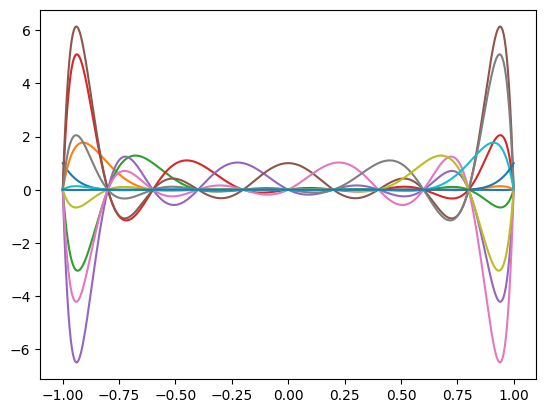

In [60]:
for i in 1:length(x)
    plot(xx, hh[i])
end


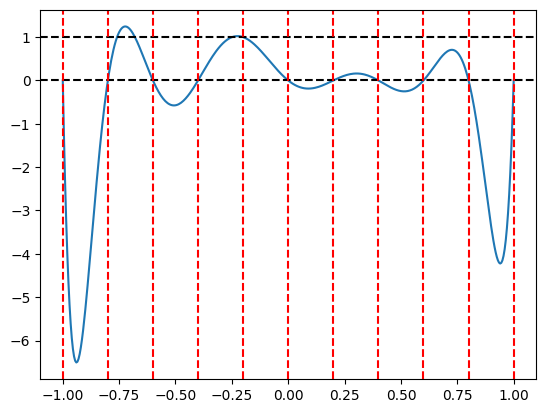

In [61]:
plot(xx, hh[5])
axhline(y=0, color="black", linestyle = "--")
axhline(y=1, color="black", linestyle = "--")

for xv in x
    axvline(x=xv, color="red", linestyle="--")
end


### Vamos organizar a interpolação de Lagrange

In [62]:
struct Lagrange
    x::Vector{Float64}
    y::Vector{Float64}
    Lagrange(x, y) = new(copy(x), copy(y))
end
Base.Broadcast.broadcastable(lgr::Lagrange) = Ref(lgr)

function lagrange(k, z, x)
 h = 1.0
    n = length(z)
    for i = 1:(k-1)
        h *= (x - z[i]) / (z[k] - z[i])
    end
    
    for i = (k+1):n
        h *= (x - z[i]) / (z[k] - z[i])
    end
    return h
end

function interp(lgr::Lagrange, x)
    
    y = lgr.y[1] * lagrange(1, lgr.x, x)
    
    for i = 2:length(lgr.x)
        y += lgr.y[i] * lagrange(i, lgr.x, x)
    end
    
    return y
end

    
(lgr::Lagrange)(x) = interp(lgr, x)    

In [63]:
x1 = range(-1, 1, step=0.2)
y1 = sin.(π.*x1);
xx = range(-1, 1, step=0.005)


-1.0:0.005:1.0

In [64]:
lgr = Lagrange(x1, y1)
yy = sin.(π.*xx);
yy1 = lgr.(xx);

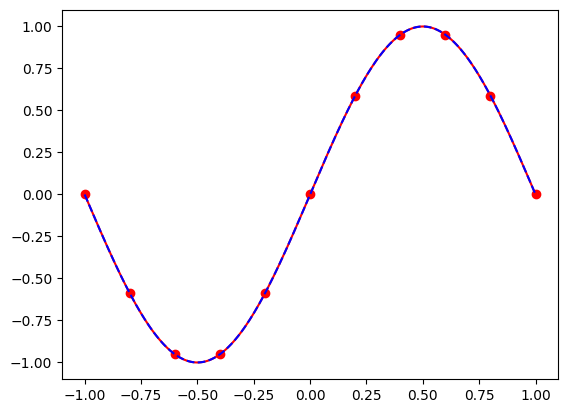

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f43eae9b940>

In [65]:

plot(x1, y1, "ro")
plot(xx, yy, "r-")
plot(xx, yy1, "b--")

## Interpolação Linear



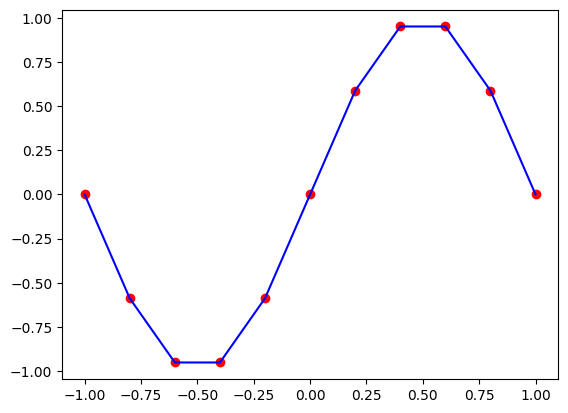

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f43eae05610>

In [66]:
x2 = range(-1, 1, step=0.2)
y2 = sin.(π.*x2);

plot(x2, y2, "ro")
plot(x2, y2, "b-")

In [81]:
struct LinearInterp
    x::Vector{Float64}
    y::Vector{Float64}
    LinearInterp(x, y) = new(copy(x), copy(y))
end
Base.Broadcast.broadcastable(lin::LinearInterp) = Ref(lin)

function interp1(lin::LinearInterp, x)
    
    if x < lin.x[1] || x > lin.x[end]
        error("Fora do Range")
    end
    
    index = 2
    n = length(lin.x)
    for i = 2:n
        if lin.x[i] >= x
            index = i
            break
        end
    end
    i1 = index-1
    return lin.y[i1] + (lin.y[index] - lin.y[i1]) * (x - lin.x[i1]) / (lin.x[index] - lin.x[i1])
    
end

(lin::LinearInterp)(x) = interp1(lin, x)


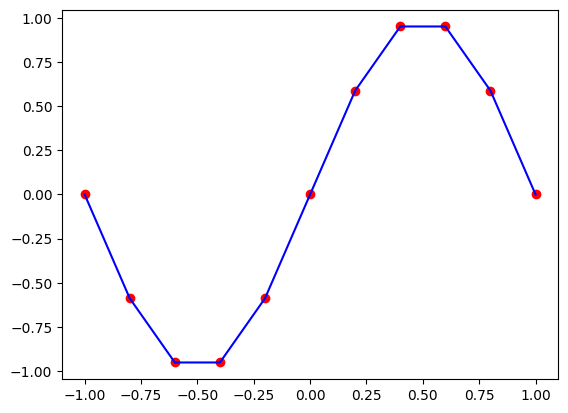

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f43eae0b460>

In [82]:
lin = LinearInterp(x2, y2)
yy2 = interp1.(lin, xx);
plot(x2, y2, "ro")
plot(xx, yy2, "b-")

In [83]:
@btime yy2 .= interp1.(lin, xx);

  3.953 μs (3 allocations: 96 bytes)


# Mínimos quadrados


In [86]:
function linfit(x,y)
    sx = sum(x)
    sx2 = sum(x->x^2, x)
    N = length(x)

    sy = sum(y)
    syx = sum(x[i]*y[i] for i in 1:N)
    
    return [N sx; sx sx2] \ [sy; syx]
end

linfit (generic function with 1 method)

In [89]:
x = 1.0:20
y = 2 .*x .+ 3.0

5.0:2.0:43.0

In [90]:
linfit(x,y)

2-element Array{Float64,1}:
 3.0
 2.0

# Pacotes

 * [Interpolations](https://github.com/JuliaMath/Interpolations.jl)
 * [Dierckx](https://github.com/kbarbary/Dierckx.jl)
 * [GridInterpolations](https://github.com/sisl/GridInterpolations.jl)

## Exercícios

### Problema 1

Interpole a função de Runge com $-1 \le x \le 1$:
$$
f(x) = \frac{1}{1 + 25x^2}
$$

 1. Use 11 pontos uniformemente distribuídos
 2. Aumente o número de pontos
 3. Tente usar os pontos $x_k = \cos\left(\frac{k\pi}{N}\right)$ para $k = 0\ldots N$.
 4. Brinque com o número de pontos

### Problema 2

Procure na Net o método de diferenças divididas de Newton a interpole a função anterior nos mesmos pontos. Este método é simplesmente um jeito inteligente de resolver a matriz apresentada lá em cima.

### Problema 3

Use a biblioteca Interpolations.jl e Dierckx.jl para fazer as interpolações. Compare a interpolação linear com os splines.

### Problema 4

Crie funções para fazer os seguintes problemas de mínimos quadrados:
 * $y = a_0 x^ a_1$
 * $y = a_0 \exp \left( a_1 \cdot x\right)$
 * Polinômio genérico de ordem n


In [ ]:
f(x) = 1.0 / (1.0 + 25x^2)
